# Loja Merconplas, planejamento de compras.

In [85]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pickle

%matplotlib inline  

# Ler dados Loja de Atacado >= 01/01/2016

In [104]:
venda_lojao_atacado = pd.read_csv('venda_lojao_fornecedor_divertoys_merconplas.csv', sep=';')

In [105]:
venda_lojao_atacado['atacado'] = 0

In [106]:
venda_lojao_atacado['atacado'] =  venda_lojao_atacado['idcliente'].apply(lambda x: 1 if x != 3516 else 0)

In [107]:
venda_lojao_atacado['atacado'] = venda_lojao_atacado['qtdvendido'].apply(lambda x: 1 if x >= 3 else 0)

In [108]:
venda_lojao_atacado['mes'] = venda_lojao_atacado['dtstatusvenda'].str[5:7]
venda_lojao_atacado['dia'] = venda_lojao_atacado['dtstatusvenda'].str[8:10]
venda_lojao_atacado['ano'] = venda_lojao_atacado['dtstatusvenda'].str[0:4]
venda_lojao_atacado['forma'] = venda_lojao_atacado['atacado'].apply(lambda x: 'VAREJO' if x == 0 else 'ATACADO')

In [109]:
resumo_produtos = (venda_lojao_atacado[[ 'idproduto', 'produto', 'forma', 'mes', 'qtdvendido']]
 .sort_values(by=['produto', 'mes'], ascending=[1,1])
 .groupby(['idproduto','produto', 'mes', 'forma']).sum())

In [110]:
type(resumo_produtos)

pandas.core.frame.DataFrame

In [111]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
resumo_produtos

qtdvendido
idproduto     produto                                         mes forma              
7898927355678 BONECA PEDALA NENEM - DIVERTOYS                 09  ATACADO           6
                                                                  VAREJO           14
7898927355753 BONECA DENGOSA - DIVERTOYS                      10  VAREJO            3
7898927355845 BONECA ANABELLE SPECIAL DOLLS VERAO - DIVERTOYS 03  VAREJO            1
                                                              04  VAREJO            1
7898927355906 SOFT CARS INDIVIDUAL - DIVERTOYS                09  ATACADO           7
                                                                  VAREJO           10
7898927355937 BONECA ANALI - DIVERTOYS                        09  VAREJO            8
7898927356057 BONECA ANABELLE OUTONO - DIVERTOYS              03  VAREJO            1
7898927356187 BONECA JULINHA - DIVERTOYS                      09  ATACADO         110
                                                                  VAREJO           45
7898927356224 MINI MIUDINHAS PRIVADINHA - DIVERTOYS           09  ATACADO          88
                                                                  VAREJO           21
7898927356231 MINI MIUDINHAS PAPINHA - DIVERTOYS              09  ATACADO          41
                                                                  VAREJO           28
7898927356248 MINI MIUDINHAS CARRINHO DE PASSEIO - DIVERTOYS  09  ATACADO          28
                                                                  VAREJO           26
7898927356262 ZOO GARDEN INDIVIDUAL - DIVERTOYS               09  ATACADO          10
                                                                  VAREJO            8
7898927356361 TATA BABY - DIVERTOYS                           09  ATACADO         161
                                                                  VAREJO           16
7898927356392 ROBUSTUS BABY - DIVERTOYS                       09  ATACADO          38
                                                                  VAREJO           44
7898927356415 ESTELINHA CHOCOLATE - DIVERTOYS                 09  ATACADO          18
                                                                  VAREJO            2

,produto,atacado,varejo,qtd_meses
0,BONECA ANABELLE OUTONO - DIVERTOYS,0,1,1
1,BONECA ANABELLE SPECIAL DOLLS VERAO - DIVERTOYS,0,2,2
2,BONECA ANALI - DIVERTOYS,0,8,1
3,BONECA DENGOSA - DIVERTOYS,0,3,1
4,BONECA JULINHA - DIVERTOYS,110,45,1
5,BONECA PEDALA NENEM - DIVERTOYS,6,14,1
6,ESTELINHA CHOCOLATE - DIVERTOYS,18,2,1
7,MINI MIUDINHAS CARRINHO DE PASSEIO - DIVERTOYS,28,26,1
8,MINI MIUDINHAS PAPINHA - DIVERTOYS,41,28,1
9,MINI MIUDINHAS PRIVADINHA - DIVERTOYS,88,21,1


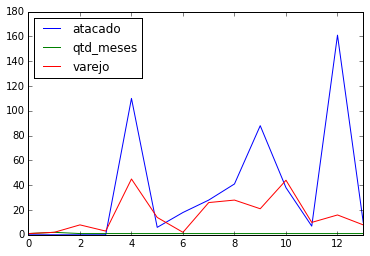

In [112]:
resumo_produtos = (venda_lojao_atacado[[ 'idproduto', 'produto', 'mes', 'forma', 'qtdvendido']]
 .sort_values(by=['produto'])
 .groupby(['idproduto','produto','mes', 'forma']).sum())
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pedidocompra = pd.DataFrame()
nome = 'Vargthon'
produtos = []

for i,row in venda_lojao_atacado.sort_values(by=['produto','mes']).iterrows():

    if nome != row['produto']:
        nome = row['produto']
        produto = {'produto': row['produto'],'qtdvendido':0,'qtd_meses':0}
        qtdatacado = .0
        qtdvarejo = .0
        for x,venda in venda_lojao_atacado[venda_lojao_atacado['produto'] == row['produto']].sort_values(by='mes').iterrows():
            if venda['forma'] == 'ATACADO':
                qtdatacado += venda['qtdvendido']
                if mes != row['mes']:
                    mes = row['mes']
                    qtdmeses += 1  
            else:
                qtdvarejo += venda['qtdvendido']
        #VERIFICA MES 
        mes = int(0)
        qtdmeses = int(0)
        for x,venda in venda_lojao_atacado[venda_lojao_atacado['produto'] == row['produto']].sort_values(by='mes').iterrows():
            if mes != int(venda['mes']):
                mes = int(venda['mes'])
                qtdmeses += 1  
        produto = {'atacado':qtdatacado,'produto': nome,'varejo':qtdvarejo,'qtd_meses': qtdmeses}
        produtos.append(produto)
        mes = 0
        qtdmeses = 0
compra_produtos = pd.DataFrame(produtos)
compra_produtos.plot()
compra_produtos[['produto','atacado','varejo','qtd_meses']]
        
        

In [84]:
plt.figure();compra_produtos['atacado'].plot()

In [124]:
produtos = []
idprodutos = []
for produto in (venda_lojao_atacado.produto.unique()):
    produtos.append(produto)
for idproduto in (venda_lojao_atacado.idproduto.unique()):
    idprodutos.append(idproduto)    

In [125]:
compra = pd.DataFrame()
compra['idproduto'] = idprodutos
compra['produto'] = produtos
compra

,idproduto,produto
0,7896743808002,FASHION BOX - DELTA
1,7896743808309,MALETA CRISTAL - DELTA
2,7896743808101,CAIXA MULTIUSO (CM810) - DELTA
3,7896743803106,GALHETEIRO - DELTA
4,7896743806800,POTE CRISTAL C/TAMPA ROSCA - 1 L - DELTA
5,7896743806756,"POTE CRISTAL C/TAMPA ROSCA - 1,750L - DELTA"
6,7896743806701,"POTE CRISTAL C/TAMPA ROSCA - 2,5L - DELTA"
7,7896743808200,QUEIJEIRA GIULIETA (QJ820) - DELTA
8,7896743801300,SALEIRO DE PAREDE (SL130) - DELTA
9,7896743801652,PORTA OLEO (PO165) - DELTA


In [116]:
compra['produto'] = compra[0]
compra.drop(0, axis=1, inplace=True)
compra

,produto
0,FASHION BOX - DELTA
1,MALETA CRISTAL - DELTA
2,CAIXA MULTIUSO (CM810) - DELTA
3,GALHETEIRO - DELTA
4,POTE CRISTAL C/TAMPA ROSCA - 1 L - DELTA
5,"POTE CRISTAL C/TAMPA ROSCA - 1,750L - DELTA"
6,"POTE CRISTAL C/TAMPA ROSCA - 2,5L - DELTA"
7,QUEIJEIRA GIULIETA (QJ820) - DELTA
8,SALEIRO DE PAREDE (SL130) - DELTA
9,PORTA OLEO (PO165) - DELTA


In [120]:
compra['idproduto'] = 0
for index, row in venda_lojao_atacado.iterrows():
    for i, compra in compra.iterrows():
        if row['produto'] == compra['produto']:
            compra['idproduto'] = row['idproduto']
compra

AttributeError: 'Series' object has no attribute 'iterrows'